<a href="https://colab.research.google.com/github/stevengregori92/Titanic-with-SVC/blob/main/Titanic_with_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

#Import Dataset

In [ ]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Cleaning Dataset

In [ ]:
len(data), len(data.dropna())

(891, 183)

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
data = data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Age       183 non-null    float64
 3   SibSp     183 non-null    int64  
 4   Parch     183 non-null    int64  
 5   Fare      183 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 10.0 KB


#Analyze Dataset

Analyze model to predict SibSp

In [ ]:
X = data.drop(['SibSp'], axis = 1)
y = data['SibSp']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [ ]:
stand = StandardScaler().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [ ]:
score = []

trainX = [X_train, X_train_stand]
testX = [X_test, X_test_stand]

for X_train_set, X_test_set in zip(trainX, testX):
  svc = SVC()
  svc.fit(X_train_set, y_train)
  y_pred = svc.predict(X_test_set)
  score.append(accuracy_score(y_test, y_pred))

In [ ]:
pd.DataFrame({'score':score}, index = ['Organised', 'Standardized'])

,score
Organised,0.652174
Standardized,0.586957


In [ ]:
svc = SVC()

svc.fit(X_train, y_train)
perm_importance = permutation_importance(svc, X_test, y_test)
perm_importance.importances

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02173913, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.23913043, 0.17391304, 0.13043478, 0.10869565, 0.15217391]])

<Axes: >

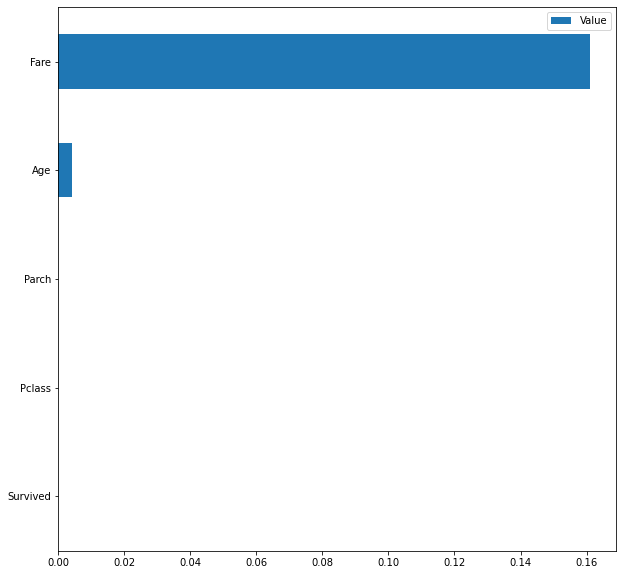

In [ ]:
sorted = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

Analyze model to predict Parch

In [ ]:
X = data.drop(['Parch'], axis = 1)
y = data['Parch']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

stand = StandardScaler().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

score = []

trainX = [X_train, X_train_stand]
testX = [X_test, X_test_stand]

for X_train_set, X_test_set in zip(trainX, testX):
  svc = SVC()
  svc.fit(X_train_set, y_train)
  y_pred = svc.predict(X_test_set)
  score.append(accuracy_score(y_test, y_pred))

In [ ]:
pd.DataFrame({'score':score}, index = ['Organised', 'Standardized'])

,score
Organised,0.673913
Standardized,0.717391


In [ ]:
svc = SVC()

svc.fit(X_train_stand, y_train)
perm_importance = permutation_importance(svc, X_test_stand, y_test)
perm_importance.importances

array([[ 0.02173913,  0.        ,  0.02173913, -0.02173913, -0.02173913],
       [ 0.02173913,  0.        ,  0.02173913,  0.        ,  0.02173913],
       [ 0.06521739,  0.06521739,  0.06521739,  0.08695652,  0.06521739],
       [ 0.04347826,  0.04347826,  0.02173913,  0.02173913,  0.04347826],
       [ 0.04347826,  0.06521739,  0.04347826,  0.02173913,  0.08695652]])

<Axes: >

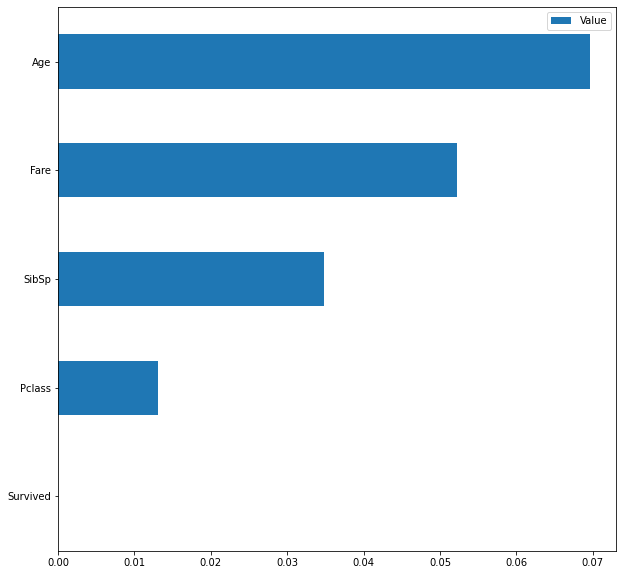

In [ ]:
sorted = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

#Insights
- The most importance feature in titanic accident that can predict SibSp with 65% accuracy is Fare.
- Some important feature that can predict Parch are Age, Fare, SibSp, and Pclass with 71% accuracy.
- 